In [1]:
import urllib.request
from rpy2.robjects import r
from rpy2.robjects import pandas2ri
import pandas as pd
pandas2ri.activate()
import seaborn as sns
from scipy import stats
import scipy.stats as stats
import pylab 
import random as rn
import numpy as np

## Change the format of float to show only 3 decimal points throught out the notebook

In [103]:
%precision %.3f

'%.3f'

# Downloading the data and loading it

In [21]:
urllib.request.urlretrieve("http://www.openintro.org/stat/data/ames.RData",\
                           './ames.Rdata')
r.load("./ames.Rdata")

'ames','plot_ci','contains'


In [22]:
ames=r['ames']
ames.shape

(2930, 82)

# Checking the missing data in the DF using missingno

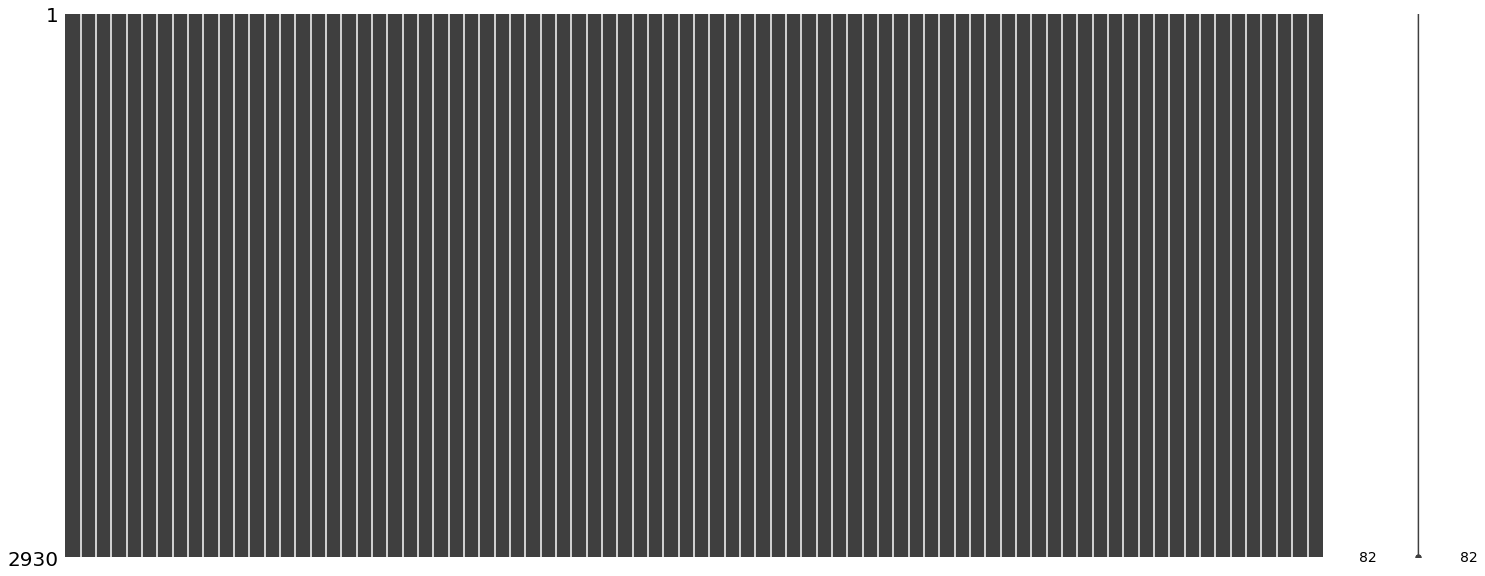

In [23]:
import missingno as msno

msno.matrix(ames);
# Since there is no white blank in the columns, there is no missing data at all.

In [24]:
ames.columns

Index(['Order', 'PID', 'MS.SubClass', 'MS.Zoning', 'Lot.Frontage', 'Lot.Area',
       'Street', 'Alley', 'Lot.Shape', 'Land.Contour', 'Utilities',
       'Lot.Config', 'Land.Slope', 'Neighborhood', 'Condition.1',
       'Condition.2', 'Bldg.Type', 'House.Style', 'Overall.Qual',
       'Overall.Cond', 'Year.Built', 'Year.Remod.Add', 'Roof.Style',
       'Roof.Matl', 'Exterior.1st', 'Exterior.2nd', 'Mas.Vnr.Type',
       'Mas.Vnr.Area', 'Exter.Qual', 'Exter.Cond', 'Foundation', 'Bsmt.Qual',
       'Bsmt.Cond', 'Bsmt.Exposure', 'BsmtFin.Type.1', 'BsmtFin.SF.1',
       'BsmtFin.Type.2', 'BsmtFin.SF.2', 'Bsmt.Unf.SF', 'Total.Bsmt.SF',
       'Heating', 'Heating.QC', 'Central.Air', 'Electrical', 'X1st.Flr.SF',
       'X2nd.Flr.SF', 'Low.Qual.Fin.SF', 'Gr.Liv.Area', 'Bsmt.Full.Bath',
       'Bsmt.Half.Bath', 'Full.Bath', 'Half.Bath', 'Bedroom.AbvGr',
       'Kitchen.AbvGr', 'Kitchen.Qual', 'TotRms.AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace.Qu', 'Garage.Type', 'Garage.Yr.Blt',
    

In [106]:
population=ames.loc[:,'Gr.Liv.Area']
print("The number of observations in population is ", len(population))
samp=population.sample(n=60)
print("The number of observations in sample is ",len(samp))

The number of observations in population is  2930
The number of observations in sample is  60


# Exercise 1
* __Q. Describe the distribution of your sample. What would you say is the “typical” size within your sample? Also state precisely what you interpreted “typical” to mean.__
* __A. The sample data is right skewed as the right tail is longer than that of a normal distribution. The Q-Q plot is also showing that the sample data does not follow a normal distribution. As such, it is better to use the median instead of mean because the mean would be exaggerated by the datas on the right tail. So the 'typical' size of the data would be around 1475__

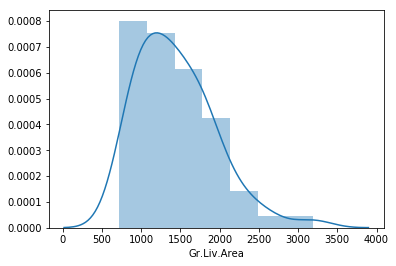

In [107]:
sns.distplot(samp);

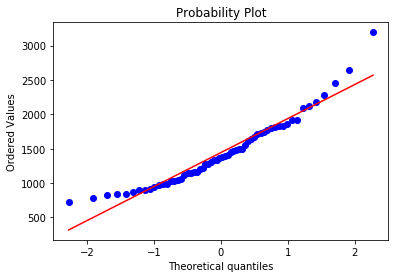

In [108]:
# Using the Q-Q plot to check out if the data follows a normal distribution
stats.probplot(samp, dist="norm", plot=pylab);

In [109]:
samp.describe()

count      60.00
mean    1,443.78
std       501.29
min       720.00
25%     1,044.00
50%     1,370.00
75%     1,745.50
max     3,194.00
Name: Gr.Liv.Area, dtype: float64

# Exercise 2
* __Q. Would you expect another student’s distribution to be identical to yours? Would you expect it to be similar? Why or why not?__
* __A. The data sampled by other students would be similar to mine as long as it's random sampled. It is because I have also random sampled from the population so it is unlikely that two random sampled data would be different from each other.__

# Calculating a 95% confidence interval

In [110]:
sample_mean=samp.mean()
sample_mean

1443.783

In [111]:
sd=(samp.std()/np.sqrt(60))
sd

64.716

In [112]:
lower = sample_mean-1.96 * sd
upper = sample_mean+1.96 * sd
ci=[lower, upper]
ci

[1316.939, 1570.627]

# Exercise 3
* Q. For the confidence interval to be valid, the sample mean must be normally distributed and have standard error s/n^(1/2). What conditions must be met for this to be true?
* A. 1. The population is normally distributed <br/>
&nbsp;&nbsp;&nbsp;&nbsp;2. If the sample size is more than 30, the sample mean is normally distribued. 

# Exercise 4
* Q. What does “95% confidence” mean?
* A. It means that if we sample, for example, 100 times, and make confidence intervals, then 95 of them have the true population mean in their intervals.

In [120]:
pop_mean=population.mean()
pop_mean

1499.690

# Exercise 5
* Q. Does your confidence interval capture the true average size of houses in Ames?
* A. Yes, my confidence interval captured the population mean

# On your own
## Question no. 1
* __What proportion of your confidence intervals include the true population mean? Is this proportion exactly equal to the confidence level?__

## Making 50 confidence intervals with different samples each

In [143]:
# creating empty list to store sample mean and sample standard deviation
samp_mean=[]
samp_sd=[]
conf_inter_95=[]

In [144]:
for i in range(50):
    samp=samp=population.sample(n=60)
    samp_mean.append(samp.mean())
    samp_sd.append((samp.std()/np.sqrt(60)))

In [145]:
if len(samp_mean) == len(samp_sd):
    for mean, sd, num in zip(samp_mean,samp_sd, range(len(samp_mean))):
        lower = mean-1.96 * sd
        upper = mean+1.96 * sd
        conf=(lower,upper)
        conf_inter_95.append(conf)
        if (num+1)%10 ==0:
            print(num+1,'th try. lower: ', lower, '| upper: ', upper)
print('50 confidence intervals were just created.')

10 th try. lower:  1386.6141506713577 | upper:  1582.585849328642
20 th try. lower:  1476.148608210516 | upper:  1708.0180584561506
30 th try. lower:  1293.1968883952902 | upper:  1525.2364449380432
40 th try. lower:  1382.3935991683466 | upper:  1634.0064008316535
50 th try. lower:  1397.2394233370012 | upper:  1642.560576662999
50 confidence intervals were just created.


In [146]:
print('The true population mean is ',pop_mean)
true_num=0
for conf in conf_inter_95:
    if pop_mean > conf[0] and pop_mean < conf[1]:
        true_num+=1
print('The total number of confidential intervals inclduing population mean in it is ', true_num)
print('Theoretically speaking, 95% percent of 50 confidence intervals contain the population mean.')
print('The proportion of our simulated confidence intervals including the population mean is ', (true_num/50)*100, '%')

The true population mean is  1499.6904436860068
The total number of confidential intervals inclduing population mean in it is  47
Theoretically speaking, 95% percent of 50 confidence intervals contain the population mean.
The proportion of our simulated confidence intervals including the population mean is  94.0 %


## Question no. 2
* __Q. Pick a confidence level of your choosing, provided it is not 95%. What is the appropriate critical value?__ <br/>
* __A. Let's say our confidence level is 99%. It means that if we make a sample 100 times, 99 confidence intervals made based on those 100 samples would have the true population mean in it. The critical value for 99% is 2.58__

## Question no. 3
* __Q. Calculate 50 confidence intervals at the confidence level you chose in the previous question. You do not need to obtain new samples, simply calculate new intervals based on the sample means and standard deviations you have already collected. Using the plot_ci function, plot all intervals and calculate the proportion of intervals that include the true population mean. How does this percentage compare to the confidence level selected for the intervals?__

In [147]:
conf_inter_99=[]

if len(samp_mean) == len(samp_sd):
    for mean, sd, num in zip(samp_mean,samp_sd, range(len(samp_mean))):
        lower = mean-2.58 * sd
        upper = mean+2.58 * sd
        conf=(lower,upper)
        conf_inter_99.append(conf)
        if (num+1)%10 ==0:
            print(num+1,'th try. lower: ', lower, '| upper: ', upper)
    print('50 confidence intervals were just created.')

10 th try. lower:  1355.618626904134 | upper:  1613.5813730958657
20 th try. lower:  1439.475378834931 | upper:  1744.6912878317355
30 th try. lower:  1256.4967544523038 | upper:  1561.9365788810296
40 th try. lower:  1342.5976968644559 | upper:  1673.8023031355442
50 th try. lower:  1358.4386286782974 | upper:  1681.3613713217028
50 confidence intervals were just created.


In [148]:
print('The true population mean is ',pop_mean)
true_num=0
for conf in conf_inter_99:
    if pop_mean > conf[0] and pop_mean < conf[1]:
        true_num+=1
print('The total number of confidential intervals inclduing population mean in it is ', true_num)
print('Theoretically speaking, 99% percent of 50 confidence intervals contain the population mean.')
print('The proportion of our simulated confidence intervals including the population mean is ', (true_num/50)*100, '%')

The true population mean is  1499.6904436860068
The total number of confidential intervals inclduing population mean in it is  50
Theoretically speaking, 99% percent of 50 confidence intervals contain the population mean.
The proportion of our simulated confidence intervals including the population mean is  100.0 %
